In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

#Importing this to automate the visualizations time created
from datetime import datetime

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
citylats = []
citylngs = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        citylats.append(lat_lng[0])
        citylngs.append(lat_lng[1])

        # Print the city count to confirm sufficient count
print(f"There are {len(cities)} cities saved")
print(f"There are {len(citylats)} lats saved")

There are 592 cities saved
There are 592 lats saved


In [3]:
#################### Creating DataFrame #####################
# Creating empty colummns that will be populated when requesting data via API

temp_dict ={
    "City" : cities,
    "Lat" : citylats,
    "Lng" : citylngs,
    "Temp":"",
    "Humidity":"",
    "Cloudiness":"",
    "Wind Speed":"",
    "City ID":""}

tempDict = pd.DataFrame(temp_dict)
tempDict.head()

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,City ID
0,oussouye,10.251306,-19.348760,,,,,
1,mataura,-26.772421,-142.924229,,,,,
2,severo-kurilsk,43.287429,157.709902,,,,,
3,vaini,-85.209221,-175.577465,,,,,
4,torbay,46.572570,-46.587581,,,,,


## Perform API Calls

In [4]:
#################### OpenWeatherMap API Key #####################
# 
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q="

### Creating a timestamp so we know exactly when the request was made to gather the weather data
### The timestamp is in this cell specifically to capture the request time, that way visualizations can be made 'whenver'
### and it will still refer to the correct time for when the data was captured.
ts = pd.to_datetime(datetime.now())

#Creating Counters to keep track of cities with temp info and cities without temp info
city_number = 0
noinfo = 0

for index, row in tempDict.iterrows():
    city = row['City']
    
    #API Call
    response = requests.get(url + city).json()
    
    try:
       
        
        tempDict.loc[index, 'Temp'] = response['main']['temp']
        tempDict.loc[index, 'Humidity'] = response['main']['humidity']
        tempDict.loc[index, 'Cloudiness'] = response['clouds']['all']
        tempDict.loc[index, 'Wind Speed'] = response['wind']['speed']
        tempDict.loc[index, 'City ID'] = response['id']
        city_number +=1
        print(f"City Number: {city_number} - City Name: {city}")
    except KeyError:
        
#         print(f"{city} did not have a temp")
        noinfo +=1
        continue

print("---------------------------------")
print(f"There are {city_number} cities that DO have info")
print(f"there are {noinfo} cities that DO NOT have any info")
print("----------------------------------")




City Number: 1 - City Name: oussouye
City Number: 2 - City Name: mataura
City Number: 3 - City Name: severo-kurilsk
City Number: 4 - City Name: vaini
City Number: 5 - City Name: torbay
City Number: 6 - City Name: hobart
City Number: 7 - City Name: kapaa
City Number: 8 - City Name: centenario do sul
City Number: 9 - City Name: kristiansund
City Number: 10 - City Name: yellowknife
City Number: 11 - City Name: saldanha
City Number: 12 - City Name: college
City Number: 13 - City Name: rikitea
City Number: 14 - City Name: alta floresta
City Number: 15 - City Name: busselton
City Number: 16 - City Name: upernavik
City Number: 17 - City Name: chuy
City Number: 18 - City Name: valparaiso
City Number: 19 - City Name: parrita
City Number: 20 - City Name: thompson
City Number: 21 - City Name: dikson
City Number: 22 - City Name: chilliwack
City Number: 23 - City Name: isangel
City Number: 24 - City Name: cherskiy
City Number: 25 - City Name: tateyama
City Number: 26 - City Name: punta arenas
City 

City Number: 214 - City Name: casa grande
City Number: 215 - City Name: wagar
City Number: 216 - City Name: ferkessedougou
City Number: 217 - City Name: bonthe
City Number: 218 - City Name: ajdabiya
City Number: 219 - City Name: kontagora
City Number: 220 - City Name: kavaratti
City Number: 221 - City Name: khatanga
City Number: 222 - City Name: mar del plata
City Number: 223 - City Name: beira
City Number: 224 - City Name: faanui
City Number: 225 - City Name: zyryanka
City Number: 226 - City Name: vostochnyy
City Number: 227 - City Name: christchurch
City Number: 228 - City Name: lumphat
City Number: 229 - City Name: rovaniemi
City Number: 230 - City Name: arraial do cabo
City Number: 231 - City Name: biak
City Number: 232 - City Name: mogadishu
City Number: 233 - City Name: wote
City Number: 234 - City Name: hennenman
City Number: 235 - City Name: neosho
City Number: 236 - City Name: belaya gora
City Number: 237 - City Name: zhanaozen
City Number: 238 - City Name: tondano
City Number

City Number: 422 - City Name: havelock
City Number: 423 - City Name: weinan
City Number: 424 - City Name: mega
City Number: 425 - City Name: aswan
City Number: 426 - City Name: mount isa
City Number: 427 - City Name: mount gambier
City Number: 428 - City Name: ust-barguzin
City Number: 429 - City Name: slave lake
City Number: 430 - City Name: wana
City Number: 431 - City Name: zhigansk
City Number: 432 - City Name: cheney
City Number: 433 - City Name: les trois-ilets
City Number: 434 - City Name: terrace bay
City Number: 435 - City Name: harper
City Number: 436 - City Name: idenao
City Number: 437 - City Name: anadyr
City Number: 438 - City Name: chibombo
City Number: 439 - City Name: haljala
City Number: 440 - City Name: santa rosa
City Number: 441 - City Name: pedernales
City Number: 442 - City Name: dustlik
City Number: 443 - City Name: preobrazheniye
City Number: 444 - City Name: general roca
City Number: 445 - City Name: nelson bay
City Number: 446 - City Name: lokosovo
City Numbe

In [5]:
################## Summary of Data and how many cities were removed becuase they didn't have any data #################

# Replace empty strings in the Temp column with NaN
tempDict['Temp'].replace('',np.nan, inplace=True)

# Create new DF with only cities that have temperature data
Complete_WeatherDF = tempDict.dropna(subset=['Temp'])

print(f"The original tempDict Data Frame's shape is: {tempDict.shape}")
print(f"The new DataFrame including only valid cities with temperatures shape is: {Complete_WeatherDF.shape}")
print(f"There were {noinfo} cities in the original tempDict Data Frame that did not have any info.")
Complete_WeatherDF.head()

The original tempDict Data Frame's shape is: (592, 8)
The new DataFrame including only valid cities with temperatures shape is: (530, 8)
There were 62 cities in the original tempDict Data Frame that did not have any info.


,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,City ID
0,oussouye,10.251306,-19.348760,89.65,79,40,6.93,2246901
1,mataura,-26.772421,-142.924229,29.64,91,20,2.86,6201424
2,severo-kurilsk,43.287429,157.709902,43.14,100,0,5.1,2121385
3,vaini,-85.209221,-175.577465,71.94,94,32,2.19,1273574
4,torbay,46.572570,-46.587581,62.60,82,75,24.16,6167817


In [6]:
############### Saving Data Frame to CSV File #########################

### This CSF file shows ONLY the cities that returned valid temperatures and were used for the visualizations below
Complete_WeatherDF.to_csv('Complete_WeatherDF.csv')

### This CSV file shows all of the cities that were originally generated, including those that did not return a temperature.
tempDict.to_csv('tempDict_DF.csv')

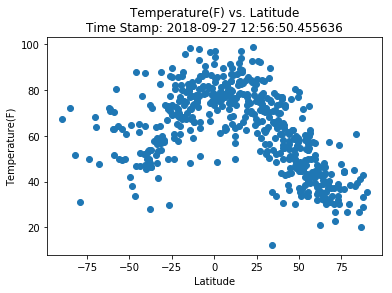

In [7]:
############## Temperature vs Latitude #######################
y = Complete_WeatherDF.Temp
x = Complete_WeatherDF.Lat
plt.scatter(x,y,marker = 'o')
plt.title(f"Temperature(F) vs. Latitude\nTime Stamp: {ts}")
plt.xlabel('Latitude')
plt.ylabel('Temperature(F)')
plt.savefig('WeatherPy_Temp.vs.Lat.png')
plt.show()

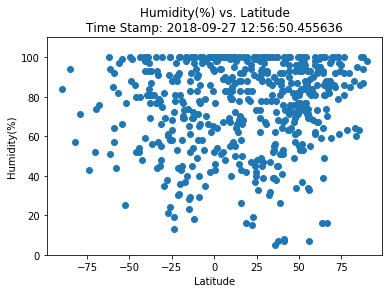

In [8]:
############## Humidity vs Latitude #######################
y = Complete_WeatherDF.Humidity
x = Complete_WeatherDF.Lat
plt.scatter(x,y,marker = 'o')
plt.title(f'Humidity(%) vs. Latitude\nTime Stamp: {ts}')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
### Note for ylim - I added the ylim because sometimes a city would pull back a humidity percentage that was greater than
### 100% and it would distort the visualization...
plt.ylim(0,110)
plt.savefig('WeatherPy_Humidity.vs.Lat.png')
plt.show()

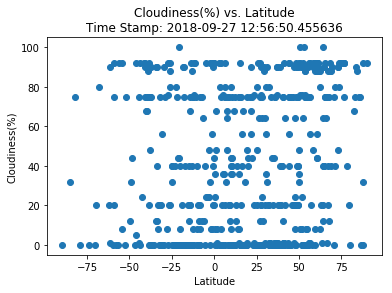

In [9]:
############## Cloudiness vs Latitude #######################
y = Complete_WeatherDF.Cloudiness
x = Complete_WeatherDF.Lat
plt.scatter(x,y,marker = 'o')
plt.title(f'Cloudiness(%) vs. Latitude\nTime Stamp: {ts}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.savefig('WeatherPy_Cloudiness.vs.Lat.png')
plt.show()

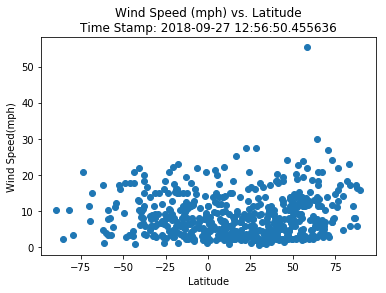

In [10]:
############## WindSpeed vs Latitude #######################
y = Complete_WeatherDF['Wind Speed']
x = Complete_WeatherDF.Lat
plt.scatter(x,y,marker = 'o')
plt.title(f'Wind Speed (mph) vs. Latitude\nTime Stamp: {ts}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.savefig('WeatherPy_WindSpeed.vs.Lat.png')
plt.show()